# Import all modules and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [2]:
loan_data = pd.read_csv('accepted_2007_to_2018Q4.csv')
loan_data.shape

/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2260701, 151)

In [3]:
loan_data = loan_data.sample(n=100000, axis=0, random_state=1)
loan_data.shape

(100000, 151)

# Remove columns with < 90% data

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types

In [4]:
# find missing values for each column


missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')


,count,%
id,0,0.000
fico_range_low,1,0.001
fico_range_high,1,0.001
hardship_flag,1,0.001
revol_bal,1,0.001
...,...,...
hardship_reason,99491,99.491
hardship_dpd,99491,99.491
hardship_loan_status,99491,99.491
orig_projected_additional_accrued_interest,99602,99.602


In [5]:
# define list of columns with a large amount of missing values

large_null_columns = missing[missing['%'] > 0.90] 
large_null_columns.reset_index(inplace=True)
large_null_columns.columns

columns_to_drop = list(large_null_columns['index'])
print(columns_to_drop)

['member_id', 'emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pas

In [6]:
# drop these columns with more than 90% of its data missing

new_data = loan_data.drop(columns_to_drop, axis=1)
new_data.shape

(100000, 56)

In [8]:
new_data = new_data.dropna(how='any')

In [9]:
new_data.shape

(99685, 56)

# Reset Index to loan id

In [10]:
# set index to something useful

new_data.set_index('id', inplace=True)

# Split dataframe into numeric and non-numeric

Split data into numeric and non_numeric valued dataframes

In [11]:
numeric_df = new_data.select_dtypes(np.number)

numeric_columns = list(numeric_df)


non_numeric_df = new_data.drop(numeric_columns, axis=1)

non_numeric_df_columns = list(non_numeric_df)

In [12]:
numeric_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,11000.0,11000.0,10.90,359.61,36000.0,16.10,0.0,675.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,669.0,665.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69743499,12000.0,12000.0,12000.0,6.99,370.48,86000.0,19.84,0.0,685.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,674.0,670.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63590274,5000.0,5000.0,5000.0,12.05,166.20,25000.0,16.95,0.0,660.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,654.0,650.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42364040,20000.0,20000.0,19975.0,15.61,699.30,40000.0,34.56,0.0,705.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,794.0,790.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
144254317,5000.0,5000.0,5000.0,18.94,183.13,68000.0,35.58,16.0,660.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,664.0,660.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
non_numeric_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N


In [14]:
numeric_df.shape

(99685, 35)

In [15]:
non_numeric_df.shape

(99685, 20)

# Review numeric dataframe

In [16]:
numeric_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.0,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000
mean,15045.914631,15039.999498,15025.724983,13.096906,445.629975,7.776934e+04,18.873475,0.302302,698.763605,702.763806,0.577078,11.590410,0.196098,1.665884e+04,50.284476,24.163635,4213.333214,4212.424132,12075.416355,12060.929530,9495.037461,2430.199991,1.531697,148.647212,24.847312,3415.052720,687.622220,675.826353,0.018057,1.0,0.004053,0.008707,11.790029,0.128535,0.045293
std,9170.634378,9168.107597,9169.100695,4.836740,266.440799,6.962416e+04,15.689850,0.838447,33.125801,33.126689,0.882980,5.623837,0.589291,2.247153e+04,24.785208,11.976822,7322.353631,7321.398396,9882.208914,9876.885949,8299.217026,2672.656570,11.509865,776.704504,136.574041,5990.313705,72.880111,109.773950,0.147593,0.0,0.066916,0.101869,637.146816,0.366039,0.404453
min,1000.000000,1000.000000,0.000000,5.310000,29.520000,1.500000e+01,0.000000,0.000000,640.000000,644.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.490000,252.820000,4.616000e+04,11.880000,0.000000,675.000000,679.000000,0.000000,8.000000,0.000000,5.937000e+03,31.400000,15.000000,0.000000,0.000000,4548.795821,4539.660000,3000.000000,730.910000,0.000000,0.000000,0.000000,310.460000,654.000000,650.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,12975.000000,12900.000000,12.620000,378.200000,6.500000e+04,17.820000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,1.133300e+04,50.000000,22.000000,0.000000,0.000000,9350.940000,9332.200000,7000.000000,1531.750000,0.000000,0.000000,0.000000,599.010000,699.000000,695.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,591.480000,9.350000e+04,24.460000,0.000000,715.000000,719.000000,1.000000,14.000000,0.000000,2.031000e+04,69.400000,31.000000,6202.250000,6195.780000,16907.352839,16889.230000,13850.000000,3095.790000,0.000000,0.000000,0.000000,3709.650000,734.000000,730.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1566.800000,9.522972e+06,999.000000,30.000000,845.000000,850.000000,10.000000,68.000000,63.000000,1.044210e+06,177.700000,136.000000,39091.640000,39091.640000,62253.312065,62253.310000,40000.000000,27876.770000,874.170000,36578.540000,6584.137200,41105.140000,850.000000,845.000000,7.000000,1.0,3.000000,4.000000,65000.000000,7.000000,63.000000


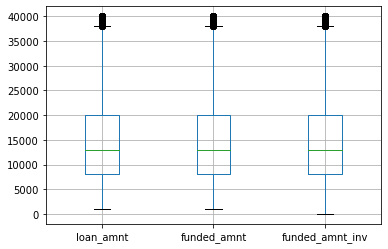

In [17]:
 boxplot = numeric_df.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'])

In [18]:
# all 3 of these columns are showing the same data ie how much money was provided. Keep loan_amnt and drop the others.

del numeric_df['funded_amnt_inv']
del numeric_df['funded_amnt']

In [19]:
numeric_df.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.0,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000
mean,15045.914631,13.096906,445.629975,7.776934e+04,18.873475,0.302302,698.763605,702.763806,0.577078,11.590410,0.196098,1.665884e+04,50.284476,24.163635,4213.333214,4212.424132,12075.416355,12060.929530,9495.037461,2430.199991,1.531697,148.647212,24.847312,3415.052720,687.622220,675.826353,0.018057,1.0,0.004053,0.008707,11.790029,0.128535,0.045293
std,9170.634378,4.836740,266.440799,6.962416e+04,15.689850,0.838447,33.125801,33.126689,0.882980,5.623837,0.589291,2.247153e+04,24.785208,11.976822,7322.353631,7321.398396,9882.208914,9876.885949,8299.217026,2672.656570,11.509865,776.704504,136.574041,5990.313705,72.880111,109.773950,0.147593,0.0,0.066916,0.101869,637.146816,0.366039,0.404453
min,1000.000000,5.310000,29.520000,1.500000e+01,0.000000,0.000000,640.000000,644.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,9.490000,252.820000,4.616000e+04,11.880000,0.000000,675.000000,679.000000,0.000000,8.000000,0.000000,5.937000e+03,31.400000,15.000000,0.000000,0.000000,4548.795821,4539.660000,3000.000000,730.910000,0.000000,0.000000,0.000000,310.460000,654.000000,650.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,12.620000,378.200000,6.500000e+04,17.820000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,1.133300e+04,50.000000,22.000000,0.000000,0.000000,9350.940000,9332.200000,7000.000000,1531.750000,0.000000,0.000000,0.000000,599.010000,699.000000,695.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,15.990000,591.480000,9.350000e+04,24.460000,0.000000,715.000000,719.000000,1.000000,14.000000,0.000000,2.031000e+04,69.400000,31.000000,6202.250000,6195.780000,16907.352839,16889.230000,13850.000000,3095.790000,0.000000,0.000000,0.000000,3709.650000,734.000000,730.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,30.990000,1566.800000,9.522972e+06,999.000000,30.000000,845.000000,850.000000,10.000000,68.000000,63.000000,1.044210e+06,177.700000,136.000000,39091.640000,39091.640000,62253.312065,62253.310000,40000.000000,27876.770000,874.170000,36578.540000,6584.137200,41105.140000,850.000000,845.000000,7.000000,1.0,3.000000,4.000000,65000.000000,7.000000,63.000000


(400.0, 900.0)

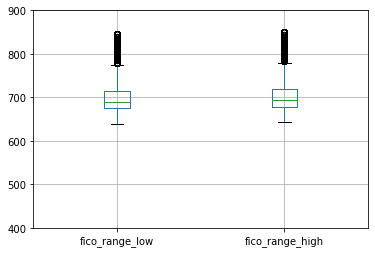

In [20]:
# fico_range_high - the upper boundary range the borrower’s FICO at loan origination belongs to.
# fico_range_low - the lower boundary range the borrower’s FICO at loan origination belongs to.

boxplot = numeric_df.boxplot(column=['fico_range_low', 'fico_range_high'])
plt.ylim(400, 900)

In [21]:
numeric_df['fico_range'] = numeric_df['fico_range_high'] - numeric_df['fico_range_low']
numeric_df['fico_range'].value_counts()

<ipython-input-21-f7d144648f31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['fico_range'] = numeric_df['fico_range_high'] - numeric_df['fico_range_low']


4.0    99665
5.0       20
Name: fico_range, dtype: int64

In [22]:
# both these columns are mostly the same. I'll keep the high and move on.

del numeric_df['fico_range_low']
del numeric_df['fico_range']

(400.0, 900.0)

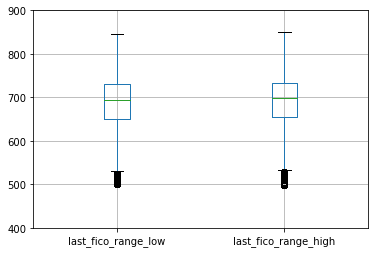

In [23]:
# last_fico_range_high - the upper boundary range the borrower’s last FICO pulled belongs to.
# last_fico_range_low - the lower boundary range the borrower’s last FICO pulled belongs to.

# larger 75% quartile from last boxplot likely due to a variation of the last time the fico was pulled (yesterday vs 10 years ago)

boxplot = numeric_df.boxplot(column=['last_fico_range_low', 'last_fico_range_high'])
plt.ylim(400, 900)

In [24]:
numeric_df['last_fico_range'] = numeric_df['last_fico_range_high'] - numeric_df['last_fico_range_low']
numeric_df['last_fico_range'].value_counts()

<ipython-input-24-69f708173da0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['last_fico_range'] = numeric_df['last_fico_range_high'] - numeric_df['last_fico_range_low']


4.0      98089
499.0     1570
5.0         17
0.0          9
Name: last_fico_range, dtype: int64

In [25]:
# both these columns are mostly the same. 
# there are some with a large difference from low to high. 
# I'll keep the high and add a column to show the difference (more telling)

del numeric_df['last_fico_range_low']

In [26]:
numeric_df.shape

(99685, 32)

In [27]:
numeric_df.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,669.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,674.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,654.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,794.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,664.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [28]:
# dti - Debt to income minus current loan amonut excluding mortgage

# int_rate - loan interest rate

# delinq_2yrs - the number of accounts on which the borrower is now delinquent over 2 years

# inq_last_6mths - the number of inquiries in past 6 months (excluding auto and mortgage inquiries)

# open_acc - the number of open credit lines in the borrower’s credit file.

# pub_rec - number of derogatory public records

# revol_bal - total credit revolving balance

# revol_util - revolving line utilization rate, or the amount of credit the borrower is using relative to 
# all available revolving credit.

# total_acc - the total number of credit lines currently in the borrower’s credit file

# out_prncp - remaining outstanding principal for total amount funded

# out_prncp_inv - remaining outstanding principal for portion of total amount funded by investors

# total_pymnt	Payments received to date for total amount funded

# total_pymnt_inv	Payments received to date for portion of total amount funded by investors

# total_rec_int	Interest received to date

# total_rec_prncp	Principal received to date

# total_rec_late_fee	Late fees received to date

# recoveries	post charge off gross recovery

# collection_recovery_fee	post charge off collection fee

# collections_12_mths_ex_med	Number of collections in 12 months excluding medical collections

# policy_code	publicly available policy_code=1 - new products not publicly available policy_code=2

# acc_now_delinq	The number of accounts on which the borrower is now delinquent.

# chargeoff_within_12_mths	Number of charge-offs within 12 months

# delinq_amnt	The past-due amount owed for the accounts on which the borrower is now delinquent.

# pub_rec_bankruptcies	Number of public record bankruptcies

# tax_liens	Number of tax liens

In [29]:
numeric_df.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
last_fico_range_high          0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_liens                     0
last_fic

In [31]:
numeric_df.shape

(99685, 32)

In [32]:
numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,669.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,674.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,654.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,794.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,664.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [33]:
numeric_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
loan_amnt,1.000000,0.095000,0.945167,0.315965,0.040003,-0.014438,0.113594,-0.024878,0.182091,-0.059046,0.319456,0.095336,0.194428,0.459007,0.459015,0.668810,0.668912,0.593040,0.593620,0.079635,0.128872,0.123337,0.319116,0.094462,-0.017591,NaN,-0.002255,0.000534,-0.001077,-0.084687,0.004204,-0.025884
int_rate,0.095000,1.000000,0.120988,-0.079191,0.108803,0.065006,-0.414117,0.189869,-0.007472,0.054162,-0.031796,0.259733,-0.038308,0.018086,0.018113,0.096226,0.096261,-0.031983,0.412348,0.070409,0.146111,0.136501,0.073861,-0.346254,0.020995,NaN,0.013800,0.014934,0.002524,0.056877,0.016456,0.071775
installment,0.945167,0.120988,1.000000,0.305858,0.041873,-0.001072,0.054835,0.000388,0.171436,-0.045401,0.303070,0.117229,0.173841,0.373655,0.373632,0.666575,0.666609,0.611136,0.529039,0.091632,0.129123,0.123649,0.305510,0.061115,-0.012699,NaN,0.001465,0.002030,-0.000589,-0.075312,0.012342,-0.018668
annual_inc,0.315965,-0.079191,0.305858,1.000000,-0.121270,0.039201,0.061125,0.032464,0.151932,-0.008374,0.317838,0.046624,0.183668,0.128693,0.128695,0.226908,0.226872,0.223890,0.137855,0.036454,0.019801,0.020001,0.117705,0.060482,-0.005798,NaN,0.012722,0.005851,0.001448,-0.042677,0.029135,-0.023963
dti,0.040003,0.108803,0.041873,-0.121270,1.000000,-0.007414,-0.020320,-0.012440,0.166979,-0.022015,0.088772,0.096865,0.130126,0.058814,0.058808,-0.004435,-0.004096,-0.024045,0.052580,0.001055,0.019545,0.020591,-0.015996,-0.027596,-0.006554,NaN,-0.000296,-0.000662,-0.002215,-0.009401,-0.017821,-0.005437
delinq_2yrs,-0.014438,0.065006,-0.001072,0.039201,-0.007414,1.000000,-0.183477,0.026013,0.043252,-0.021103,-0.026939,0.005619,0.112053,-0.030453,-0.030456,0.011063,0.011215,0.002164,0.029268,0.036042,0.016383,0.016254,-0.008010,-0.099895,0.062003,NaN,0.114230,0.128445,0.028192,-0.049501,0.010091,-0.012553
fico_range_high,0.113594,-0.414117,0.054835,0.061125,-0.020320,-0.183477,1.000000,-0.095306,0.017657,-0.183079,0.008972,-0.476179,0.010026,0.124409,0.124428,0.014695,0.014415,0.058521,-0.110781,-0.033064,-0.056649,-0.055776,0.033108,0.403638,-0.075792,NaN,-0.036478,-0.055299,-0.012370,-0.195267,-0.056585,-0.054085
inq_last_6mths,-0.024878,0.189869,0.000388,0.032464,-0.012440,0.026013,-0.095306,1.000000,0.138977,0.066809,-0.010163,-0.078467,0.159889,-0.086310,-0.086318,0.026516,0.025253,0.010048,0.052550,0.018010,0.048908,0.043768,0.031529,-0.121564,0.017725,NaN,0.000316,0.010048,0.000586,0.078244,0.014593,0.030929
open_acc,0.182091,-0.007472,0.171436,0.151932,0.166979,0.043252,0.017657,0.138977,1.000000,-0.016005,0.247060,-0.126152,0.714243,0.062232,0.062228,0.131996,0.132161,0.117730,0.109928,0.010593,0.043030,0.042327,0.065855,0.004601,0.005575,NaN,0.021765,0.009027,0.003717,-0.016958,-0.007505,-0.027510
pub_rec,-0.059046,0.054162,-0.045401,-0.008374,-0.022015,-0.021103,-0.183079,0.066809,-0.016005,1.000000,-0.085822,-0.056363,0.003173,-0.050607,-0.050609,-0.026380,-0.026200,-0.029586,-0.010311,0.000610,0.015961,0.016381,-0.008930,-0.079689,0.014536,NaN,-0.000311,-0.004380,0.004490,0.643256,0.719635,0.020117


# Review non-numeric dataframe

In [34]:
non_numeric_df.isnull().sum()

term                    0
grade                   0
sub_grade               0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
url                     0
purpose                 0
zip_code                0
addr_state              0
earliest_cr_line        0
initial_list_status     0
last_pymnt_d            0
last_credit_pull_d      0
application_type        0
hardship_flag           0
disbursement_method     0
debt_settlement_flag    0
dtype: int64

In [36]:
non_numeric_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N


In [37]:
del non_numeric_df['url']

In [38]:
non_numeric_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N


In [39]:
non_numeric_df['debt_settlement_flag'].value_counts()

N    98196
Y     1489
Name: debt_settlement_flag, dtype: int64

# Review both data frames and combine into one for further analysis

In [40]:
non_numeric_df.head()
non_numeric_df.shape

(99685, 19)

In [41]:
non_numeric_df.head()
non_numeric_df.shape

(99685, 19)

In [43]:
result = pd.merge(non_numeric_df, numeric_df, left_index=True, right_index=True, how='outer')

In [44]:
result.shape

(99685, 51)

In [45]:
result.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,669.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,674.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,654.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,794.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,664.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [48]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99685 entries, 132555889 to 4275474
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term                        99685 non-null  object 
 1   grade                       99685 non-null  object 
 2   sub_grade                   99685 non-null  object 
 3   home_ownership              99685 non-null  object 
 4   verification_status         99685 non-null  object 
 5   issue_d                     99685 non-null  object 
 6   loan_status                 99685 non-null  object 
 7   pymnt_plan                  99685 non-null  object 
 8   purpose                     99685 non-null  object 
 9   zip_code                    99685 non-null  object 
 10  addr_state                  99685 non-null  object 
 11  earliest_cr_line            99685 non-null  object 
 12  initial_list_status         99685 non-null  object 
 13  last_pymnt_d              

In [50]:
# all columns have the same data type, non-null values, indexed correctly, and no columns showing duplicate or
# similar information. All have a unique value add. 

# Tony - any suggestions? I feel like I cheated by just removing all null values but due to only losing out 
# on .03% of the data I don't think its a big deal.

len(result) / len(loan_data)

0.99685